# Módulo 03 - Processamento e Visualização de dados

# - Aula - 01 - O básico de Data e Hora

In [3]:
from datetime import datetime
dt = datetime(year=2019, month=11, day=2)
dt

datetime.datetime(2019, 11, 2, 0, 0)

In [4]:
print(type(dt))

<class 'datetime.datetime'>


In [5]:
from dateutil import parser
date = parser.parse("26th of October, 2019")
date

datetime.datetime(2019, 10, 26, 0, 0)

In [6]:
import numpy as np
date = np.array("2019-11-02", dtype=np.datetime64)
date

array('2019-11-02', dtype='datetime64[D]')

In [7]:
date + np.arange(12)

array(['2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05',
       '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09',
       '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13'],
      dtype='datetime64[D]')

=========================================================================================================    

# - Aula - 02 - Exemplo de Série Temporal

In [140]:
from pandas import read_csv
series = read_csv("female_birth.csv", header= 0, parse_dates=[0], index_col=0, squeeze=True)
print(type(series))


<class 'pandas.core.series.Series'>


/tmp/ipykernel_14523/3084604744.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv("female_birth.csv", header= 0, parse_dates=[0], index_col=0, squeeze=True)


In [15]:
print(series.head())

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64


In [17]:
print(series.size)

#Ano da série

366


In [19]:
print(series.describe())

count     366.000000
mean       47.218579
std       100.472534
min        23.000000
25%        37.000000
50%        42.000000
75%        46.000000
max      1959.000000
Name: Daily total female births in California, 1959, dtype: float64


=================================================================================

# - Aula - 03 - Mais sobre data e hora

In [23]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15, 6


In [30]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [74]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
date = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

/tmp/ipykernel_14523/590885748.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [59]:
date.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [60]:
print(type(date.dtypes))

<class 'pandas.core.series.Series'>


In [61]:
date.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

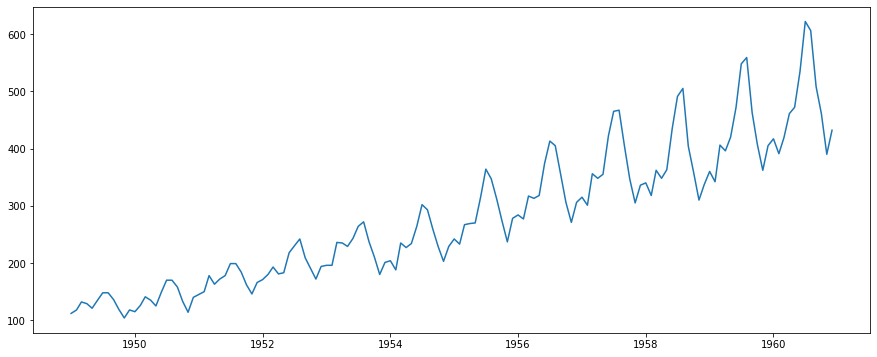

In [62]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(date)



# - Aula - 04 - Tipos de Dados e Visualização

In [76]:
# - Aula - 05 - Pré-processamento de dados

# - Aula - 05 - Pré-processamento de dados


In [77]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [82]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.head()


,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [83]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [86]:
df.index = pd.to_datetime(df.index)
df

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
...,...,...,...,...
2016-11-30 18:39:27.600,42.8903,13.0197,10.7,2.0
2016-11-30 18:43:14.850,42.9443,13.2003,8.6,2.6
2016-11-30 20:18:27.550,43.0092,13.1288,8.0,2.2


In [87]:
df.describe()

,Latitude,Longitude,Depth/Km,Magnitude
count,8086.000000,8086.000000,8086.000000,8086.000000
mean,42.829557,13.161034,9.968328,2.398368
std,0.125927,0.083058,2.194064,0.426381
min,41.581300,12.537700,0.200000,2.000000
25%,42.751350,13.103200,8.900000,2.100000
50%,42.821800,13.160700,9.900000,2.300000
75%,42.911000,13.215650,10.800000,2.600000
max,43.927300,13.852500,47.900000,6.500000


# - Aula - 06 - Gráfico de linhas


In [91]:
from datetime import datetime
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15, 6

In [92]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.index = pd.to_datetime(df.index)
df.head(n=7)

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6
2016-08-24 03:43:58.700,42.7298,13.2137,10.7,3.4
2016-08-24 03:44:38.660,42.6760,13.2858,10.8,2.7


<AxesSubplot:title={'center':'Magnitude média por dia'}, xlabel='Time', ylabel='Magnitude'>

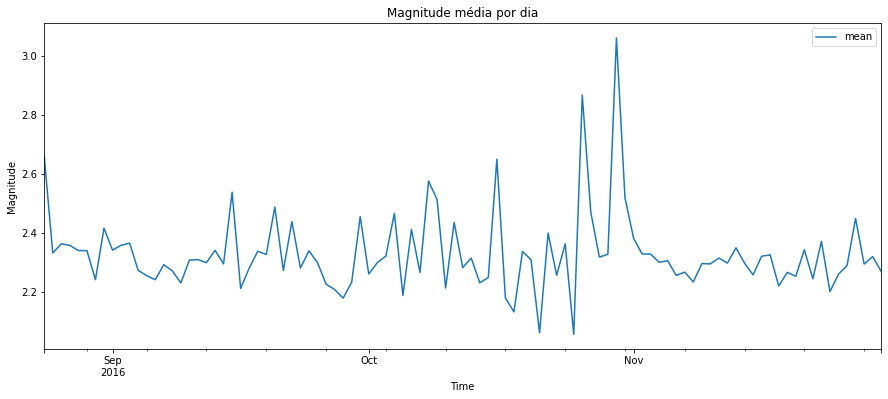

In [99]:
df["Magnitude"].resample("D").apply([np.mean]).plot(title="Magnitude média por dia", ylabel="Magnitude")


<AxesSubplot:title={'center':'Magnitude média a cada dois dias'}, xlabel='Time', ylabel='Magnitude'>

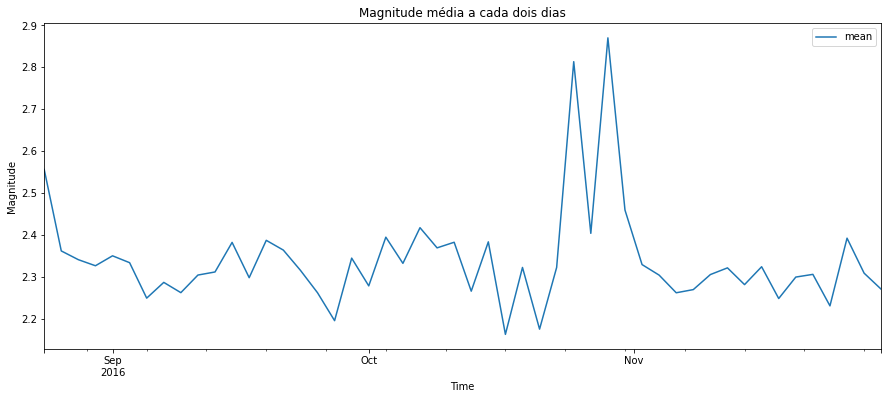

In [105]:
df["Magnitude"].resample("2D").apply([np.mean]).plot(title="Magnitude média a cada dois dias", 
                                                     xlabel="Time", ylabel="Magnitude")


In [107]:
magn3 = df.loc[df["Magnitude"] >= 3.0, "Magnitude"]

<AxesSubplot:title={'center':'Média móvel da Magnitude'}, xlabel='Tempo', ylabel='Magnitude'>

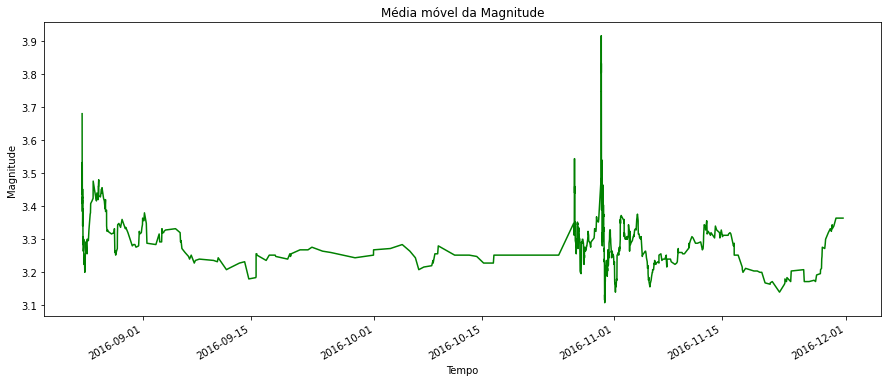

In [110]:
pd.Series.rolling(magn3, window=25).mean().plot(style="-g", title="Média móvel da Magnitude", ylabel="Magnitude",
                                               xlabel="Tempo")


# - Aula - 07 - Visualização de Resumo e Agregações

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [115]:
data = pd.read_csv("avocado.csv", parse_dates=["Date"])

In [116]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [122]:
summr = data.groupby("Date")["Total Volume"].mean().reset_index()
summr.head()

,Date,Total Volume
0,2015-01-04,7.840216e+05
1,2015-01-11,7.273686e+05
2,2015-01-18,7.258221e+05
3,2015-01-25,7.080211e+05
4,2015-02-01,1.106048e+06


<AxesSubplot:title={'center':'Gráfico Linha Continua'}, xlabel='Volume', ylabel='Date'>

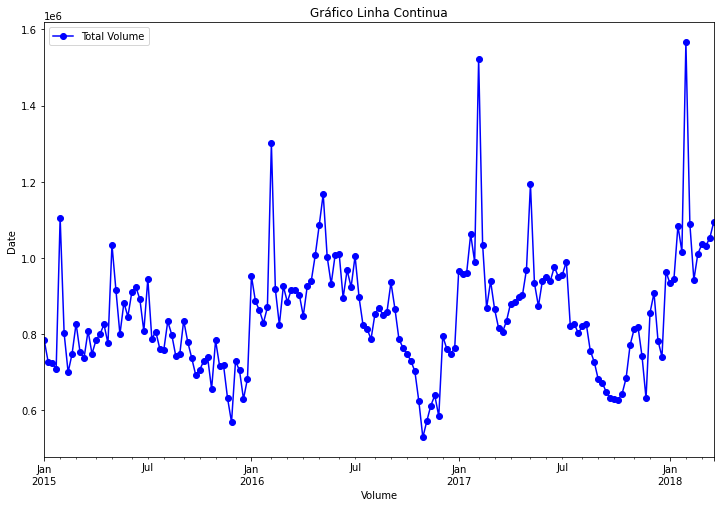

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
summr.set_index("Date").plot(title="Gráfico Linha Continua", ax=ax, marker="o", 
                             xlabel="Volume", ylabel="Date", linestyle="-", color="blue")

# linestyle - Posso mudar de "-" de linhas continuas para "--" para trasejado (pontilhado)

Text(0.5, 0, 'Mês')

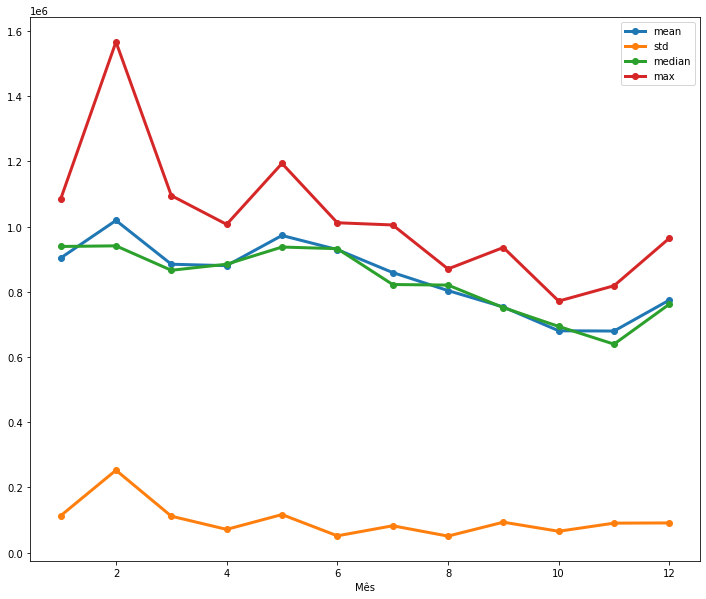

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
(summr.set_index("Date")
    .assign(month=lambda df: df.index.month)
    .groupby("month")["Total Volume"].agg(["mean", "std", "median", "max"])
    .plot(ax=ax, marker="o", linewith=3))
ax.set_xlabel("Mês")

# - Aula - 08 - Gráficos com Múltiplas linhas

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 13, 6

In [4]:
df = pd.read_csv("all-stocks-2006-01-01-to-2018-01-01.csv", parse_dates=["Date"])

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [9]:
rng = pd.date_range(start="2006-01-01", end="2018-01-01", freq="B")
rng[~rng.isin(df.Date.unique())]

DatetimeIndex(['2006-01-02', '2006-01-16', '2006-02-20', '2006-04-14',
               '2006-05-29', '2006-07-04', '2006-09-04', '2006-11-23',
               '2006-12-25', '2007-01-01',
               ...
               '2017-01-02', '2017-01-16', '2017-02-20', '2017-04-14',
               '2017-05-29', '2017-07-04', '2017-09-04', '2017-11-23',
               '2017-12-25', '2018-01-01'],
              dtype='datetime64[ns]', length=111, freq=None)

In [10]:
sample_dates = pd.date_range(start="2006-01-01", end="2018-01-01", freq="B")

In [12]:
year_end_dates = sample_dates[sample_dates.is_year_end]
year_end_dates

DatetimeIndex(['2006-12-29', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29'],
              dtype='datetime64[ns]', freq=None)

In [13]:
worst_stocks = df[df.Date == df.Date.max()].sort_values("Open").head(5)
worst_stocks

,Date,Open,High,Low,Close,Volume,Name
33217,2017-12-29,17.27,17.53,17.27,17.45,76149513,GE
66434,2017-12-29,36.23,36.49,36.22,36.22,11421487,PFE
21137,2017-12-29,38.41,38.62,38.30,38.30,12583621,CSCO
24157,2017-12-29,45.70,46.18,45.69,45.88,8371536,KO
45296,2017-12-29,46.21,46.49,46.09,46.16,17394491,INTC


In [17]:
ws = worst_stocks.Name.values
ws

array(['GE', 'PFE', 'CSCO', 'KO', 'INTC'], dtype=object)

In [22]:
tdf = df.copy()
tdf = df.set_index("Date")

Name
CSCO    AxesSubplot(0.125,0.2;0.775x0.68)
GE      AxesSubplot(0.125,0.2;0.775x0.68)
INTC    AxesSubplot(0.125,0.2;0.775x0.68)
KO      AxesSubplot(0.125,0.2;0.775x0.68)
PFE     AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

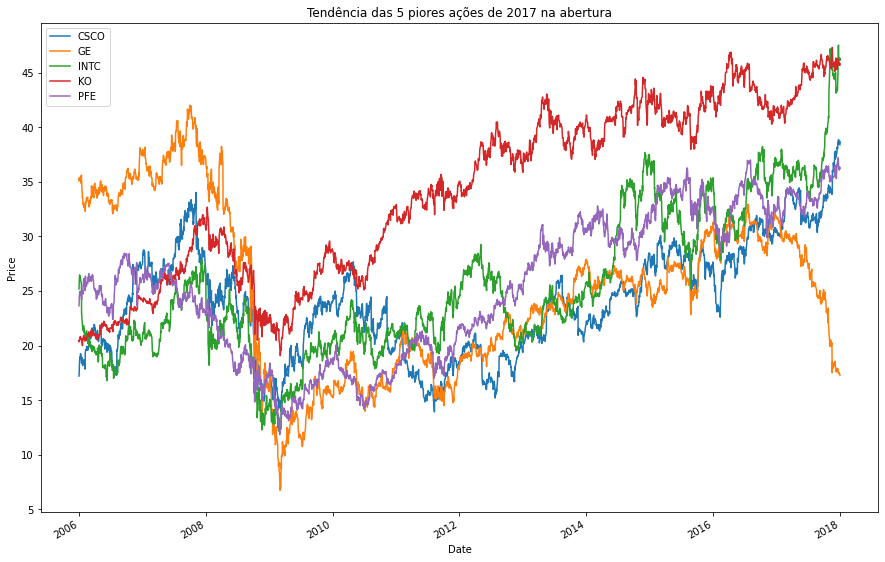

In [28]:
tdf[tdf.Name.isin(ws)].groupby("Name").Open.plot(title="Tendência das 5 piores ações de 2017 na abertura", legend=True, ylabel="Price", figsize=(15, 10))

In [29]:
best_stocks = df[df.Date == df.Date.max()].sort_values("Open", ascending=False).head(5)
best_stocks

,Date,Open,High,Low,Close,Volume,Name
90592,2017-12-29,1182.35,1184.00,1167.50,1169.47,2688391,AMZN
87573,2017-12-29,1055.49,1058.05,1052.70,1053.40,1180340,GOOGL
12078,2017-12-29,296.94,297.30,294.83,294.91,1824591,BA
36237,2017-12-29,255.87,256.65,252.91,254.76,2519253,GS
3019,2017-12-29,236.48,237.31,235.37,235.37,1343878,MMM


In [31]:
bs = best_stocks.Name.values
bs

array(['AMZN', 'GOOGL', 'BA', 'GS', 'MMM'], dtype=object)

Name
AMZN     AxesSubplot(0.125,0.2;0.775x0.68)
BA       AxesSubplot(0.125,0.2;0.775x0.68)
GOOGL    AxesSubplot(0.125,0.2;0.775x0.68)
GS       AxesSubplot(0.125,0.2;0.775x0.68)
MMM      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Open, dtype: object

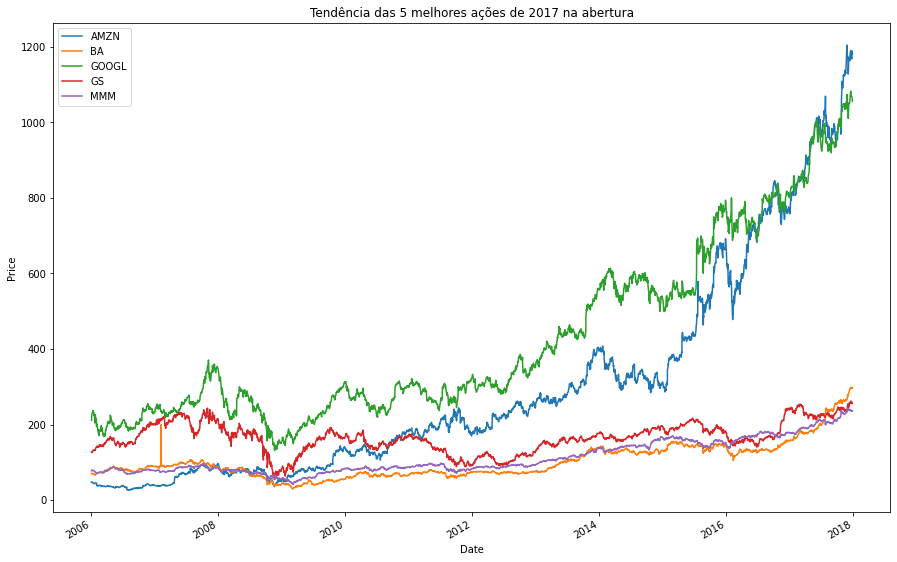

In [32]:
tdf[tdf.Name.isin(bs)].groupby("Name").Open.plot(title="Tendência das 5 melhores ações de 2017 na abertura", legend=True, ylabel="Price", figsize=(15, 10))

# - Aula - 09 - Histogramas

In [35]:
from datetime import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as rcPrams
rcParams["figure.figsize"] = 15, 6
    

In [39]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [40]:
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [42]:
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [50]:
plt.figure()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

Text(0.5, 0, 'Profundidade/Km')

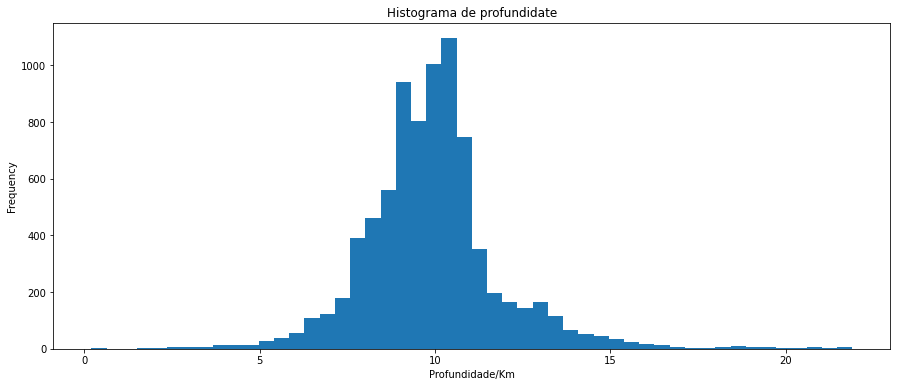

In [55]:
depth = df[(df["Depth/Km"] < 22) & (df["Depth/Km"] >=0 )]["Depth/Km"]
depth.plot(kind="hist", stacked=True, bins=50)
plt.title("Histograma de profundidate")
plt.xlabel("Profundidade/Km")

# - Aula - 09 - Exibindo Variações de Duas Séries Temporais

In [57]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index("Time")
df.dtypes

Latitude     float64
Longitude    float64
Depth/Km     float64
Magnitude    float64
dtype: object

In [58]:
df.index = pd.to_datetime(df.index)
df.head()

,Latitude,Longitude,Depth/Km,Magnitude
Time,,,,
2016-08-24 03:36:32.000,42.6983,13.2335,8.1,6.0
2016-08-24 03:37:26.580,42.7123,13.2533,9.0,4.5
2016-08-24 03:40:46.590,42.7647,13.1723,9.7,3.8
2016-08-24 03:41:38.900,42.7803,13.1683,9.7,3.9
2016-08-24 03:42:07.170,42.7798,13.1575,9.7,3.6


In [59]:
depth_magn = df.where((df["Magnitude"] >= 3.0)).dropna()[["Magnitude", "Depth/Km"]]
dm = depth_magn.groupby(depth_magn.index.hour).mean()
dm.head()

,Magnitude,Depth/Km
Time,,
0,3.219048,9.071429
1,3.341667,9.720833
2,3.271429,9.457143
3,3.393478,9.556522
4,3.369811,9.173585


Text(0.5, 1.0, 'Magnitude e profundidade durante o dia')

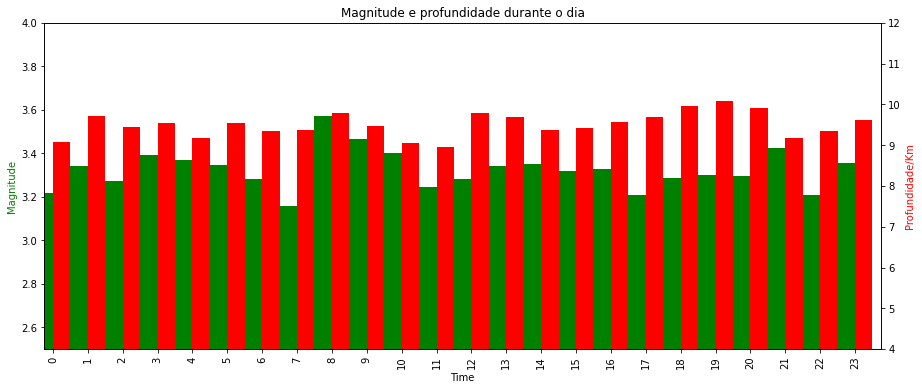

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([2.5, 4.0])
ax.set_ylabel("Magnitude")
ax.set_xlabel("Hora do dia")
ax.yaxis.label.set_color("green")

ax2 = ax.twinx()
ax2.set_ylim([4.0, 12])
ax2.set_ylabel("Profundidade/Km")
ax2.set_xlabel("Hora do dia")
ax2.yaxis.label.set_color("red")

width = 0.5

dm["Magnitude"].plot(kind="bar", color="green", ax=ax, width=width, position=1)

dm["Depth/Km"].plot(kind="bar", color="red", ax=ax2, width=width, position=0)

plt.grid(False)
plt.title("Magnitude e profundidade durante o dia")

